In [4]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
# Load the diabetes dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [6]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(diabetes_dataset.head())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
# Display the number of rows and columns in the dataset
print("\nShape of the dataset:")
print(diabetes_dataset.shape)


Shape of the dataset:
(768, 9)


In [8]:
# Display statistical measures of the data
print("\nStatistical measures of the data:")
print(diabetes_dataset.describe())


Statistical measures of the data:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  


In [9]:
# Display the count of non-diabetic and diabetic individuals
print("\nCount of non-diabetic and diabetic individuals:")
print(diabetes_dataset['Outcome'].value_counts())


Count of non-diabetic and diabetic individuals:
0    500
1    268
Name: Outcome, dtype: int64


In [10]:
# Display mean values of different health indicators for diabetic and non-diabetic individuals
print("\nMean values of different health indicators for diabetic and non-diabetic individuals:")
print(diabetes_dataset.groupby('Outcome').mean())


Mean values of different health indicators for diabetic and non-diabetic individuals:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


In [11]:
# Separate the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


In [14]:
# Model Evaluation
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)
#Getting accuracy score
training_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
test_accuracy = accuracy_score(Y_test, classifier.predict(X_test))
print('\nAccuracy on training data:', training_accuracy)
print('Accuracy on test data:', test_accuracy)


Accuracy on training data: 0.7833876221498371
Accuracy on test data: 0.7727272727272727


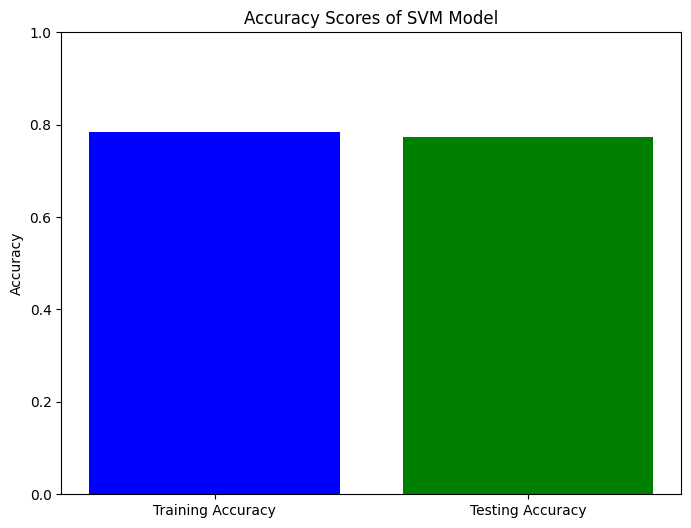

In [24]:
# Plotting the accuracy scores
labels = ['Training Accuracy', 'Testing Accuracy']
accuracy_scores = [training_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Scores of SVM Model')
plt.ylim(0, 1)  # Set y-axis limit to show accuracy scores between 0 and 1
plt.ylabel('Accuracy')
plt.show()

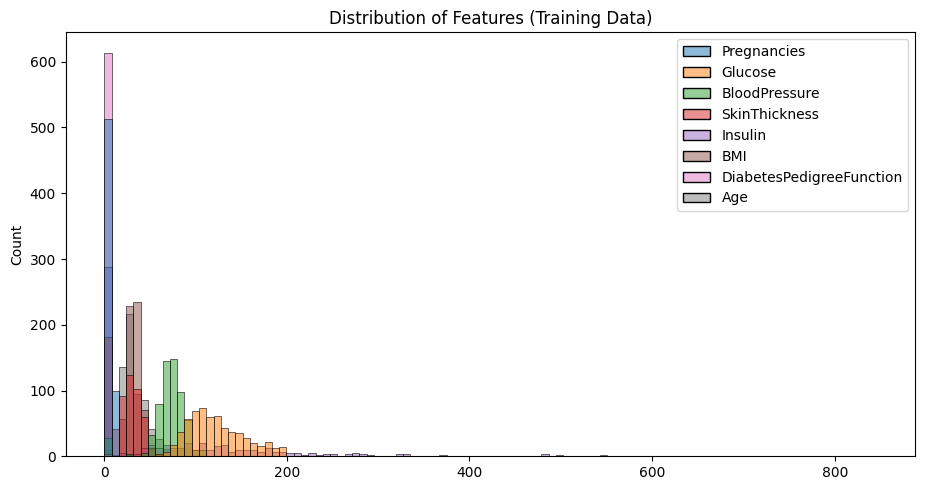

In [16]:
# Distribution plot for training data
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=X_train)
plt.title('Distribution of Features (Training Data)')
plt.tight_layout()
plt.show()

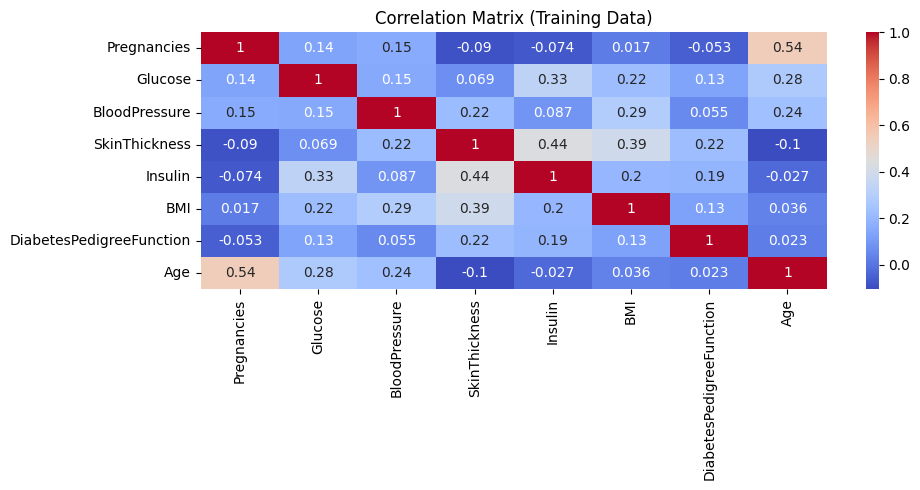

In [17]:
# Correlation heatmap for training data
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Training Data)')
plt.tight_layout()
plt.show()


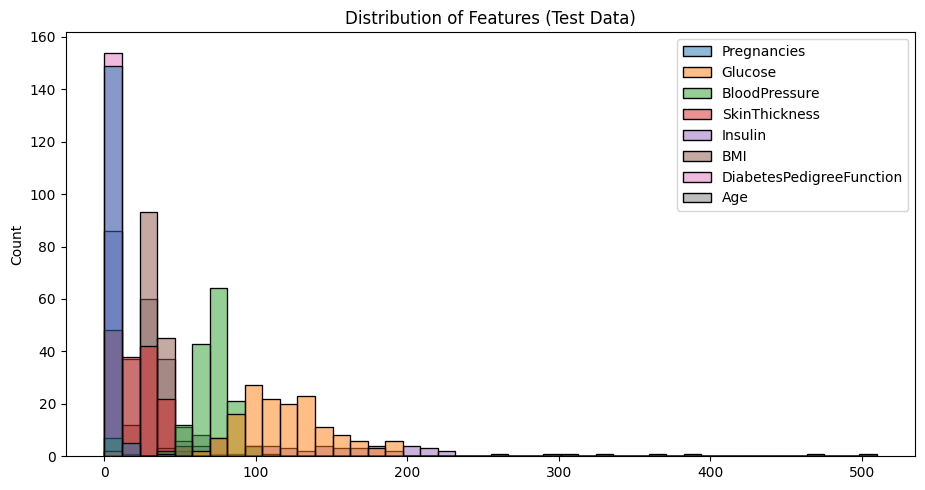

In [18]:
plt.figure(figsize=(18, 5))
# Distribution plot for test data
plt.subplot(1, 2, 1)
sns.histplot(data=X_test)
plt.title('Distribution of Features (Test Data)')
plt.tight_layout()
plt.show()

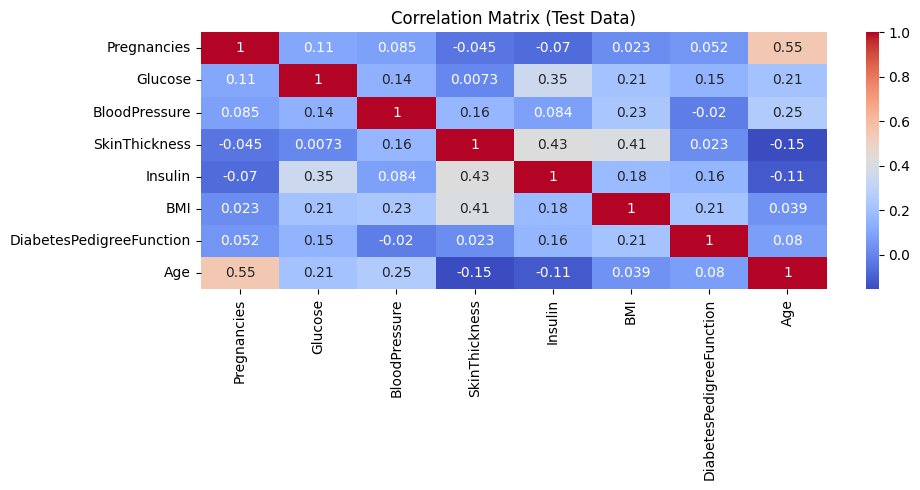

In [21]:
# Correlation heatmap for test data
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
sns.heatmap(X_test.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Test Data)')
plt.tight_layout()
plt.show()


In [19]:
# Predictive System
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_reshaped = np.asarray(input_data).reshape(1, -1)
prediction = classifier.predict(input_data_reshaped)
if prediction[0] == 0:
    print("\nThe person is not diabetic.")
else:
    print("\nThe person is diabetic.")


The person is diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [20]:
# Save the trained model
import pickle
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# Load the saved model
loaded_model = pickle.load(open(filename, 'rb'))
